# Data Science Internship
# - Anisha Walde

# Golden Project 02: Flight Delay predicition Model 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = 'Data.csv'
df = pd.read_csv(file_path, nrows=10000)

In [3]:
print("Dataset overview:")
print(df.head())

Dataset overview:
           ID       DATOP     FLTID DEPSTN ARRSTN                  STD  \
0  train_id_0  2016-01-03  TU 0712     CMN    TUN  2016-01-03 10:30:00   
1  train_id_1  2016-01-13  TU 0757     MXP    TUN  2016-01-13 15:05:00   
2  train_id_2  2016-01-16  TU 0214     TUN    IST  2016-01-16 04:10:00   
3  train_id_3  2016-01-17  TU 0480     DJE    NTE  2016-01-17 14:10:00   
4  train_id_4  2016-01-17  TU 0338     TUN    ALG  2016-01-17 14:30:00   

                   STA STATUS         AC  target  
0  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0  
1  2016-01-13 16.55.00    ATA  TU 31BIMO    20.0  
2  2016-01-16 06.45.00    ATA  TU 32AIMN     0.0  
3  2016-01-17 17.00.00    ATA  TU 736IOK     0.0  
4  2016-01-17 15.50.00    ATA  TU 320IMU    22.0  


In [4]:
df.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
9995,train_id_9995,2016-02-20,TU 0647,FRA,DJE,2016-02-20 19:10:00,2016-02-20 22.00.00,ATA,TU 736IOQ,50.0
9996,train_id_9996,2016-02-20,TU 0875,GVA,TUN,2016-02-20 19:00:00,2016-02-20 20.55.00,ATA,TU 736IOP,23.0
9997,train_id_9997,2016-02-21,TU 0997,NCE,TUN,2016-02-21 10:15:00,2016-02-21 11.50.00,ATA,TU 320IMR,0.0
9998,train_id_9998,2016-02-21,TU 0514,TUN,BCN,2016-02-21 14:05:00,2016-02-21 15.50.00,ATA,TU 32AIML,0.0
9999,train_id_9999,2016-02-21,TU 0694,DJE,MRS,2016-02-21 14:00:00,2016-02-21 15.55.00,ATA,TU 32AIMN,0.0


In [5]:
df.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [7]:
df.size

100000

In [8]:
df.shape

(10000, 10)

In [9]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             target
count  10000.000000
mean      37.522000
std       81.403014
min        0.000000
25%        0.000000
50%       14.000000
75%       37.000000
max     2123.000000


In [10]:
df.isna().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [11]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10000 non-null  object 
 1   DATOP   10000 non-null  object 
 2   FLTID   10000 non-null  object 
 3   DEPSTN  10000 non-null  object 
 4   ARRSTN  10000 non-null  object 
 5   STD     10000 non-null  object 
 6   STA     10000 non-null  object 
 7   STATUS  10000 non-null  object 
 8   AC      10000 non-null  object 
 9   target  10000 non-null  float64
dtypes: float64(1), object(9)
memory usage: 781.4+ KB
None


# Explore and preprocess the data

In [12]:
df = df.drop(['ID', 'DATOP', 'FLTID', 'STD', 'STA'], axis=1, errors='ignore')  # Ignore if columns are not present
df.dropna(inplace=True)

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['DEPSTN'] = label_encoder.fit_transform(df['DEPSTN'])
df['ARRSTN'] = label_encoder.fit_transform(df['ARRSTN'])
df['STATUS'] = label_encoder.fit_transform(df['STATUS'])
df['AC'] = label_encoder.fit_transform(df['AC'])

# Feature scaling

In [14]:
scaler = StandardScaler()
X = df.drop('target', axis=1)
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

In [15]:
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the Random Forest Classifier

In [16]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

# Evaluate the model

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.22


In [19]:
# Display metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.37      0.69      0.48       596
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         6
         4.0       0.07      0.06      0.06        18
         5.0       0.04      0.04      0.04        57
         6.0       0.00      0.00      0.00        27
         7.0       0.00      0.00      0.00        35
         8.0       0.06      0.04      0.05        24
         9.0       0.00      0.00      0.00        40
        10.0       0.06      0.07      0.06        76
        11.0       0.00      0.00      0.00        26
        12.0       0.06      0.03      0.04        30
        13.0       0.20      0.08      0.11        26
        14.0       0.00      0.00      0.00        16
        15.0       0.16      0.11      0.13        63
        16.0       0.00      0.00      0.00        14
        17.0       0.00      0.00      0.00        15
   

# Visualization 

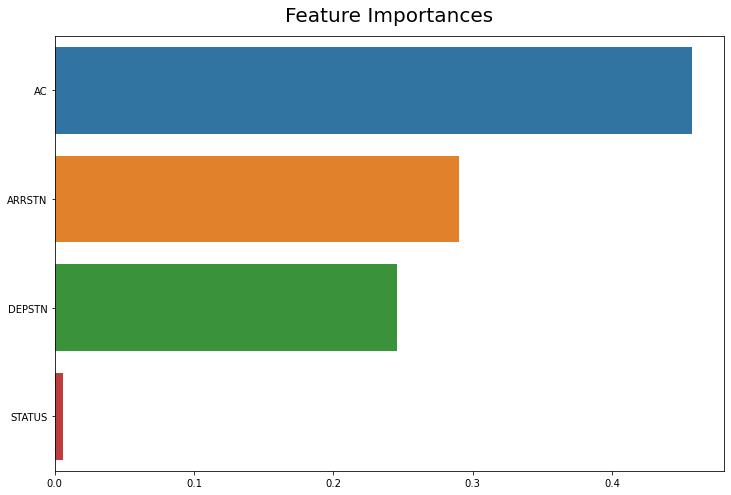

In [20]:
# Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances',y=1.02, size=20)
plt.show()

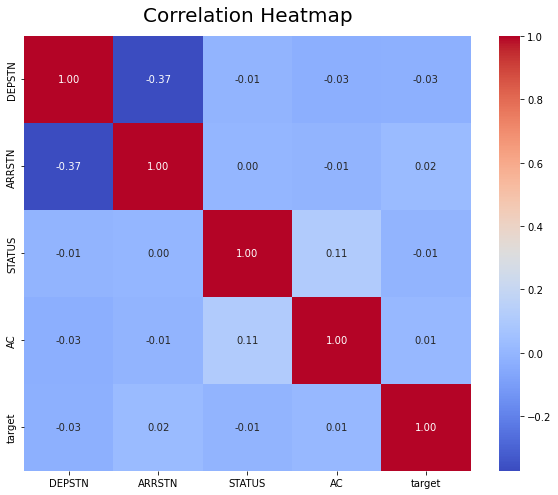

In [21]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', y=1.02, size=20)
plt.show()

<Figure size 1152x720 with 0 Axes>

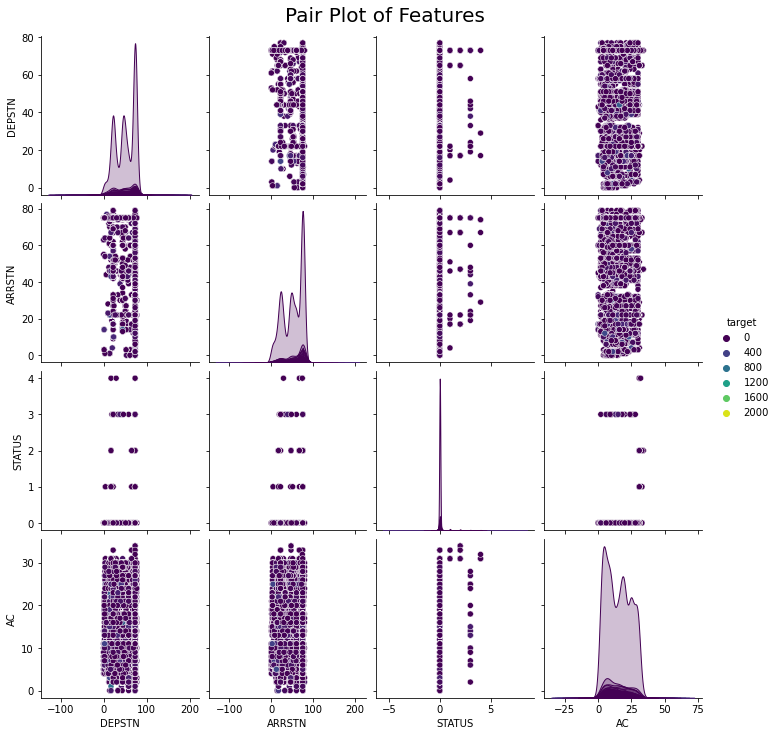

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Visualize pair plot
plt.figure(figsize=(16, 10))
sns.pairplot(df, hue='target', palette='viridis')
plt.suptitle('Pair Plot of Features', y=1.02, size=20)
plt.show()

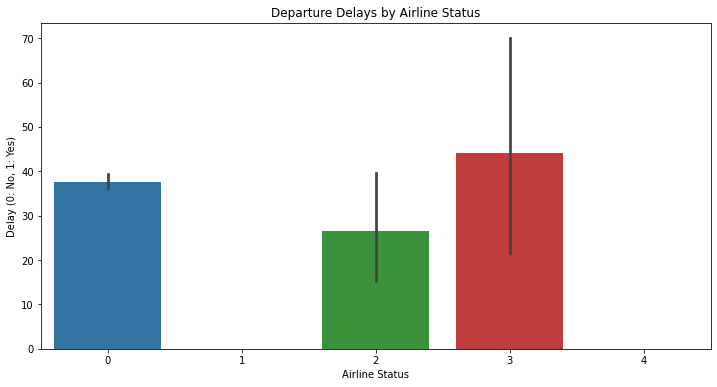

In [23]:
# Visualizing the relationship between departure delays and airline status
plt.figure(figsize=(12, 6))
sns.barplot(x='STATUS', y='target', data=df)
plt.title('Departure Delays by Airline Status')
plt.xlabel('Airline Status')
plt.ylabel('Delay (0: No, 1: Yes)')
plt.show()

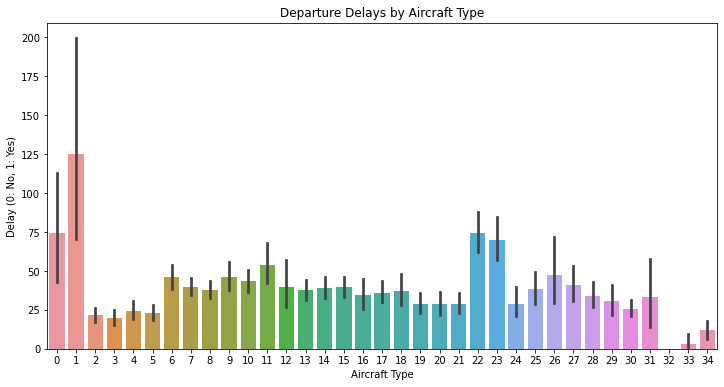

In [24]:
# Visualizing the relationship between departure delays and aircraft type
plt.figure(figsize=(12, 6))
sns.barplot(x='AC', y='target', data=df)
plt.title('Departure Delays by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Delay (0: No, 1: Yes)')
plt.show()

**Thank You**